## Technical Assessment
#### ZNPHI Public Health Intelligence Officer – Bioinformatics & Big Data Visualization
##### Malambo Mutila |  mutilamalambo@gmail.com | +260979233231

##### Key Libraries

In [258]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import geopandas as gpd

from shapely.geometry import Point
from shapely.geometry import LineString
import folium

print("Done")

Done


##### Loading Data

In [232]:
maternal_deaths = pd.read_excel("data/Maternal deaths.xlsx", sheet_name=None)
measles_lab = pd.read_excel("data/measles_lab.xlsx", sheet_name=None)
weekly_data = pd.read_csv("data/weekly_data_by_province.csv")
zambian_provinces = gpd.read_file("./data/shapefiles/zmb_admbnda_adm1_dmmu_20201124.shp")

### EDA

##### 1. Weekly Data by Province (Summary)

##### 2. Measles Laboratory Tests (Summary of VPD Surveillance Indicators)

##### 3. Maternal Deaths

In [233]:
# Check the sheets in the Excel workbook
maternal_deaths.keys()

dict_keys(['MD summary', 'MD linelist'])

##### 3.1. Maternal Deaths Summary

In [234]:
# Preview the data in MD Summary
maternal_deaths_summary = maternal_deaths["MD summary"]
maternal_deaths_summary.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Weekly Maternal Death,NaN,NaN,Maternal Death Cumulative,NaN
1,Central,3.0,NaN,Central,36.0
2,Copperbelt,1.0,NaN,Copperbelt,58.0
3,Eastern,1.0,NaN,Eastern,29.0
4,Lusaka,4.0,NaN,Lusaka,88.0
5,Luapula,1.0,NaN,Luapula,20.0
6,Muchinga,2.0,NaN,Muchinga,21.0
7,Northern,NaN,NaN,Northern,38.0
8,North Western,1.0,NaN,North Western,30.0
9,Southern,1.0,NaN,Southern,47.0


In [235]:
# Set the second row as the header - this creates a duplicate
maternal_deaths_summary.columns = maternal_deaths_summary.iloc[0]

# Remove the first row which is now a duplicate
maternal_deaths_summary = maternal_deaths_summary[1:]


# Make a copy to avoid SettingWithCopyWarning
maternal_deaths_summary = maternal_deaths_summary.copy()

# Drop unwanted columns
maternal_deaths_summary.drop(columns=[maternal_deaths_summary.columns[2], maternal_deaths_summary.columns[3]], inplace=True)


In [236]:
# Reset the index for clarity
maternal_deaths_summary.reset_index(drop=True, inplace=True)

In [237]:
maternal_deaths_summary.head(12)

,Weekly Maternal Death,NaN,NaN
0,Central,3.0,36.0
1,Copperbelt,1.0,58.0
2,Eastern,1.0,29.0
3,Lusaka,4.0,88.0
4,Luapula,1.0,20.0
5,Muchinga,2.0,21.0
6,Northern,NaN,38.0
7,North Western,1.0,30.0
8,Southern,1.0,47.0
9,Western,1.0,28.0


In [238]:
# Rename the columns by index
maternal_deaths_summary.rename(columns={
    maternal_deaths_summary.columns[0]: "Province",
    maternal_deaths_summary.columns[1]: "Weekly Maternal Death",
    maternal_deaths_summary.columns[2]: "Maternal Death Cumulative",
}, inplace=True)

In [239]:
# Drop Total row by index
maternal_deaths_summary.drop(index=10, inplace=True)

In [240]:
maternal_deaths_summary.head(20)

,Province,Weekly Maternal Death,Maternal Death Cumulative
0,Central,3.0,36.0
1,Copperbelt,1.0,58.0
2,Eastern,1.0,29.0
3,Lusaka,4.0,88.0
4,Luapula,1.0,20.0
5,Muchinga,2.0,21.0
6,Northern,NaN,38.0
7,North Western,1.0,30.0
8,Southern,1.0,47.0
9,Western,1.0,28.0


##### 3.2. Map of Zambian Provinces

In [241]:
zambian_provinces.head(11)

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,25.222638,9.141987,Central,ZM10,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((29.99949 -12.00267, 30.00002 -12.002..."
1,8.863299,2.588911,Copperbelt,ZM20,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((27.94644 -12.28198, 27.95514 -12.297..."
2,14.657072,4.253458,Eastern,ZM30,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((33.25764 -11.58238, 33.26164 -11.585..."
3,15.141461,4.122920,Luapula,ZM40,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((29.37374 -8.70908, 29.36164 -8.72298..."
4,10.056553,2.141454,Lusaka,ZM50,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((29.98254 -14.64278, 29.98494 -14.643..."
5,17.987122,7.202235,Muchinga,ZM11,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((32.16182 -9.05766, 32.19187 -9.09042..."
6,22.554858,10.428078,North-Western,ZM70,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((24.15075 -11.02947, 24.15078 -11.029..."
7,15.227700,6.389407,Northern,ZM60,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((30.48184 -8.28098, 30.48544 -8.28408..."
8,13.616327,5.726470,Southern,ZM80,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((27.61591 -15.5235, 27.61987 -15.5241..."
9,16.139219,10.758037,Western,ZM90,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((22.03129 -13.73621, 22.03666 -13.738..."


In [242]:
# Compare spellings of provinces in both data frames
# Provinces in maternal_deaths_summary
print(maternal_deaths_summary['Province'].unique())


['Central' 'Copperbelt' 'Eastern' 'Lusaka' 'Luapula' 'Muchinga' 'Northern'
 'North Western' 'Southern' 'Western']


In [243]:
# Provinces in ADM1_EN column
print(zambian_provinces['ADM1_EN'].unique())

['Central' 'Copperbelt' 'Eastern' 'Luapula' 'Lusaka' 'Muchinga'
 'North-Western' 'Northern' 'Southern' 'Western']


In [244]:
# Standardising the names
maternal_deaths_summary['Province'] = maternal_deaths_summary['Province'].replace({
    "North Western": "North-Western"
})

In [245]:
print(maternal_deaths_summary['Province'].unique())

print(zambian_provinces['ADM1_EN'].unique())

['Central' 'Copperbelt' 'Eastern' 'Lusaka' 'Luapula' 'Muchinga' 'Northern'
 'North-Western' 'Southern' 'Western']
['Central' 'Copperbelt' 'Eastern' 'Luapula' 'Lusaka' 'Muchinga'
 'North-Western' 'Northern' 'Southern' 'Western']


##### 3.3. Cumulative Distribution of Maternal Deaths (2024) by Province

In [246]:
# Ensure both dataframes have consistent province naming
map_maternal_deaths = zambian_provinces.merge(maternal_deaths_summary, left_on="ADM1_EN", right_on="Province")

In [247]:
print(map_maternal_deaths.crs)

EPSG:4326


In [248]:
# Re-project the GeoDataFrame to UTM Zone 35S
map_maternal_deaths = map_maternal_deaths.to_crs(epsg=32735)

In [249]:
# Calculate centroids for each polygon in the projected CRS and store them in a new variable
centroids = map_maternal_deaths.geometry.centroid

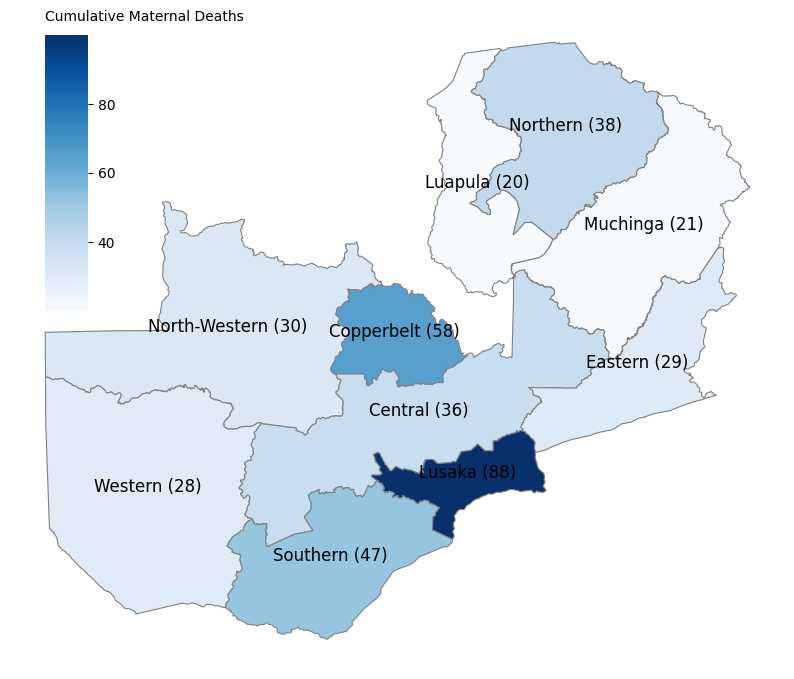

In [336]:
# Step 1: Define a custom colormap with a smooth gradient between specified colors
cmap = "Blues"

# Step 2: Plot the GeoDataFrame with improved boundary clarity
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111)

map_maternal_deaths.plot(column='Maternal Death Cumulative',
                         cmap=cmap,
                         linewidth=0.8,  # Increase the linewidth to make boundaries clearer
                         ax=ax,
                         edgecolor='grey')  # Set edge color to grey for better visibility

# Remove axes
ax.axis('off')

# Step 3: Add annotation for each province's value using centroids
centroids = map_maternal_deaths.geometry.centroid
for x, y, province, value in zip(centroids.x, centroids.y, map_maternal_deaths['Province'], map_maternal_deaths['Maternal Death Cumulative']):
    ax.text(x, y, f'{province} ({value:.0f})', fontsize=12, ha='center', color='black')

# Step 4: Create a new axes for the colorbar
cbar_ax = fig.add_axes([0.16, 0.52, 0.043, 0.23])  # [left, bottom, width, height] (adjust as needed)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=20, vmax=100))
sm._A = []  # This is required to create an empty mappable for the colorbar

# Create the colorbar and set customized ticks
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_ticks([40, 60, 80])  # Show only 40, 60, and 80 as ticks

# Remove the border (spine) around the colorbar
cbar.outline.set_visible(False)

# Position the colorbar label using a text object
fig.text(0.16, 0.765, 'Cumulative Maternal Deaths', fontsize=10, rotation=0, va='center')  # [left, bottom] coordinates, adjust as needed

plt.show()